In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
filename = "raw-flight-data.csv"
df=pd.read_csv(filename)

In [3]:
df.head(10)

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3.0,1.0
1,19,5,DL,14869,12478,0.0,-8.0
2,19,5,DL,14057,14869,-4.0,-15.0
3,19,5,DL,15016,11433,28.0,24.0
4,19,5,DL,11193,12892,-6.0,-11.0
5,19,5,DL,10397,15016,-1.0,-19.0
6,19,5,DL,15016,10397,0.0,-1.0
7,19,5,DL,10397,14869,15.0,24.0
8,19,5,DL,10397,10423,33.0,34.0
9,19,5,DL,11278,10397,323.0,322.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719418 entries, 0 to 2719417
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DayofMonth       int64  
 1   DayOfWeek        int64  
 2   Carrier          object 
 3   OriginAirportID  int64  
 4   DestAirportID    int64  
 5   DepDelay         float64
 6   ArrDelay         float64
dtypes: float64(2), int64(4), object(1)
memory usage: 145.2+ MB


In [5]:
import seaborn as sns

In [6]:
df.isnull().sum().sort_values(ascending=False)

ArrDelay           29033
DepDelay           27444
DestAirportID          0
OriginAirportID        0
Carrier                0
DayOfWeek              0
DayofMonth             0
dtype: int64

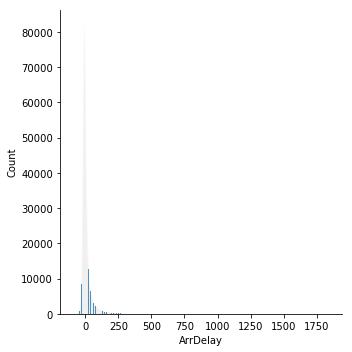

In [7]:
sns.displot(df['ArrDelay'])

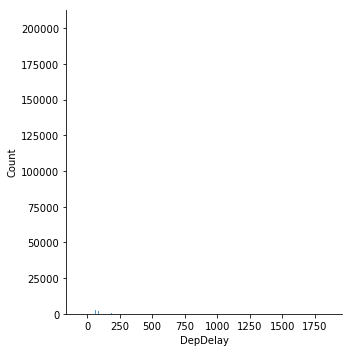

In [8]:
sns.displot(df['DepDelay'])

In [9]:
df.duplicated().sum()

22435

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

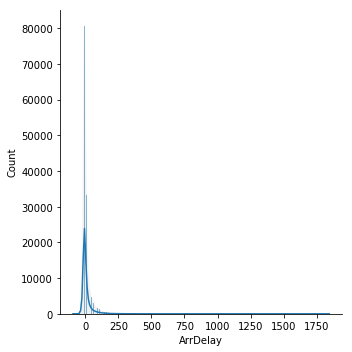

In [12]:
sns.displot(df['ArrDelay'],kde=True)

In [13]:
df.skew(axis = 0, skipna = True) 

DayofMonth         0.002763
DayOfWeek          0.075571
OriginAirportID   -0.052750
DestAirportID     -0.053339
DepDelay           6.740699
ArrDelay           5.697472
dtype: float64

In [14]:
df.isnull().sum().sort_values(ascending=False)

ArrDelay           23798
DepDelay           22209
DestAirportID          0
OriginAirportID        0
Carrier                0
DayOfWeek              0
DayofMonth             0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673185 entries, 0 to 2719417
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DayofMonth       int64  
 1   DayOfWeek        int64  
 2   Carrier          object 
 3   OriginAirportID  int64  
 4   DestAirportID    int64  
 5   DepDelay         float64
 6   ArrDelay         float64
dtypes: float64(2), int64(4), object(1)
memory usage: 163.2+ MB


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673185 entries, 0 to 2673184
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DayofMonth       int64  
 1   DayOfWeek        int64  
 2   Carrier          object 
 3   OriginAirportID  int64  
 4   DestAirportID    int64  
 5   DepDelay         float64
 6   ArrDelay         float64
dtypes: float64(2), int64(4), object(1)
memory usage: 142.8+ MB


In [19]:
df.isnull().sum().sort_values(ascending=False)

ArrDelay           0
DepDelay           0
DestAirportID      0
OriginAirportID    0
Carrier            0
DayOfWeek          0
DayofMonth         0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

X=df[['DayofMonth','DayOfWeek','OriginAirportID',
      'DestAirportID','DepDelay']]
y=df['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)

clf = GradientBoostingRegressor().fit(X_train, y_train)
yhat = clf.predict(X_test)
print('Score:',clf.score(X_test, y_test))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Score: 0.8868309523082252
MAE: 8.975


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

X=df[['DayofMonth','DayOfWeek','OriginAirportID',
      'DestAirportID','DepDelay']]
y=df['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)
print(X_train.shape, y_train.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
model.score(X_test, y_test)

(1791033, 5) (1791033,)
(1772781, 5) (1772781,)
MAE: 9.056


0.8850928363502979

### Remove Outliers

In [22]:
from scipy import stats
df_1= df[(np.abs(stats.zscore(df[['DayofMonth','DayOfWeek',
                                  'OriginAirportID','DestAirportID',
                                  'DepDelay',
                                  'ArrDelay']])) < 3).all(axis=1)]

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608612 entries, 0 to 2673184
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DayofMonth       int64  
 1   DayOfWeek        int64  
 2   Carrier          object 
 3   OriginAirportID  int64  
 4   DestAirportID    int64  
 5   DepDelay         float64
 6   ArrDelay         float64
dtypes: float64(2), int64(4), object(1)
memory usage: 159.2+ MB


In [24]:
df_1.skew(axis = 0, skipna = True) 

DayofMonth         0.003877
DayOfWeek          0.073330
OriginAirportID   -0.055177
DestAirportID     -0.054327
DepDelay           2.647150
ArrDelay           1.876742
dtype: float64

In [25]:
df_1.reset_index(drop=True, inplace=True)

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608612 entries, 0 to 2608611
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DayofMonth       int64  
 1   DayOfWeek        int64  
 2   Carrier          object 
 3   OriginAirportID  int64  
 4   DestAirportID    int64  
 5   DepDelay         float64
 6   ArrDelay         float64
dtypes: float64(2), int64(4), object(1)
memory usage: 139.3+ MB


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

X=df_1[['DayofMonth','DayOfWeek','OriginAirportID',
      'DestAirportID','DepDelay']]
y=df_1['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)

clf = GradientBoostingRegressor().fit(X_train, y_train)
yhat = clf.predict(X_test)
print('Score:',clf.score(X_test, y_test))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Score: 0.7284524083408573
MAE: 8.741


In [28]:
from sklearn.neural_network import MLPRegressor

X=df_1[['DayofMonth','DayOfWeek','OriginAirportID',
      'DestAirportID','DepDelay']]
y=df_1['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)

clf = MLPRegressor().fit(X_train, y_train)
yhat = clf.predict(X_test)
print('Score:',clf.score(X_test, y_test))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Score: 0.7230359520062364
MAE: 8.876


In [29]:
from sklearn.inspection import permutation_importance

X=df_1[['DayofMonth','DayOfWeek','OriginAirportID',
      'DestAirportID','DepDelay']]
y=df_1['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)

r = permutation_importance(clf, X_test, y_test, n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_1.columns[i]:<8}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

DestAirportID1.444 +/- 0.001
Carrier 0.001 +/- 0.000
OriginAirportID0.000 +/- 0.000
DayOfWeek0.000 +/- 0.000
DayofMonth0.000 +/- 0.000
